# 【問題1】パイプラインの作成

- このコンペティションでは何を予測する？目的変数は？
- 企業がこのコンペティションを開催することで得られるメリットは？
- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？

- ターゲットは住宅ローンの債務不履行になった人を予測する
- 列名はTARGET
- 企業側のメリットとしては、顧客を審査する際の基準等がわかる。
- 予測結果に影響してきそうなことは、収入、現在の雇用形態、家族の形態、年齢
- 他社の信用情報に傷がついている人

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [226]:
!pwd

/content


In [0]:
# データの読み込み
df = pd.read_csv('../application_train.csv')

In [0]:
testdf = pd.read_csv('../application_test.csv')
test_features = testdf.loc[:,['EXT_SOURCE_3','EXT_SOURCE_1','EXT_SOURCE_2','DAYS_BIRTH','DAYS_EMPLOYED','AMT_GOODS_PRICE','AMT_CREDIT']]

In [0]:
#インポート
import numpy as np

from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# 【問題3】前処理・Feature Engineering・学習

In [0]:
#データフレームと特徴量の名前を入れると欠損値を予測して、dfに代入して返してくれる関数
def kesson(df,feature,fillagg=0):
    df_copyed = df.copy()
    """
    df:データフレーム
    feature:特徴量の名前''でくくったものを入力
    """
    tg = df_copyed['TARGET']
    df = df_copyed.drop('TARGET',axis=1)
    #dfをnullとfullに分ける
    df_full = df_copyed[df_copyed[feature].notnull()]
    df_isn = df_copyed[df_copyed[feature].isnull()]
    
    #Xとyに分ける
    y = df_full[feature]
    X = df_full.drop(feature,axis=1)
    #カテゴリ変数を全てダミー変数へ
    X = pd.get_dummies(X)
    X = X.fillna(fillagg) #他の欠損値を0で代入
    #分類器達
    estimators = [('scaler',StandardScaler()),
                  ('pca', PCA(n_components=4)),
                  ('rfr', RandomForestRegressor(random_state=1))]
    #パラメーター達
    parameters = {'rfr__n_estimators': range(10, 50, 20)}
    #pipelineをインスタンス化
    pl = Pipeline(estimators)
    clf = GridSearchCV(pl, parameters, n_jobs=-1)
    #学習
    clf.fit(X, y)
    
    #nullデータをXとyに分ける
    y2 = df_isn[feature]
    X2 = df_isn.drop(feature,axis=1)
    
    #欠損値を補完、検証用と学習用データに分ける。
    X2 = pd.get_dummies(X2)
    X2 = X2.fillna(fillagg)
    
    sorce = clf.predict(X2)
    df_isn[feature] = sorce
    df_fill = pd.concat([df_isn,df_full]).sort_index()
    #df = pd.concat([tg,df_fill],axis=1)
    df[feature] = df_fill[feature]
    return df[feature]

In [0]:
df = pd.read_csv('../concat_target_features.csv')

In [0]:
#df['EXT_SOURCE_3'] = kesson(df,'EXT_SOURCE_3')

In [0]:
df['EXT_SOURCE_3'] *=1.1

In [0]:
#df['EXT_SOURCE_2'] = df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean())

In [0]:
#df['EXT_SOURCE_1'] = kesson(df,'EXT_SOURCE_1')

In [0]:
#df = pd.get_dummies(df)

In [0]:
#df = df.fillna(0)

In [0]:
target = df['TARGET']
features = df.loc[:,['EXT_SOURCE_3','EXT_SOURCE_1','EXT_SOURCE_2','DAYS_BIRTH','DAYS_EMPLOYED','AMT_GOODS_PRICE','AMT_CREDIT']]

In [0]:
#pd.concat([target, features], axis=1).to_csv('./concat_target_features.csv')

In [0]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=num_test, random_state=23)

In [245]:
estimators = [('scaler',StandardScaler()),
              ('pca', PCA(n_components=4)),
             ("classifier",RandomForestRegressor())]
pipe = Pipeline(estimators)

# 候補学習アルゴリズムとそのハイパパラメータの辞書を作成
search_space = [{"classifier__max_depth": [2, 14, 20],
                "classifier__n_estimators": [100]}]


# グリッド探索器を作成
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0)

# グリッド探索器を訓練
best_model = gridsearch.fit(X_train, y_train)

##########

# 最良のモデルを表示
best_model.best_estimator_.get_params()["classifier"]

##########

# ターゲットベクトルを予測
target_probabilities = best_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to f

# 【問題2】指標値の関数作成

0.7198208183958443


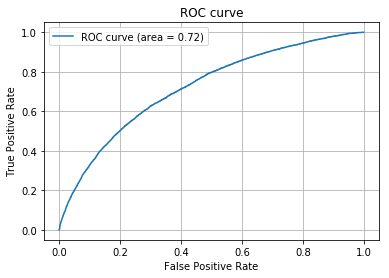

In [246]:
from sklearn import metrics
# FPR, TPR(, しきい値) を算出
fpr, tpr, thresholds = metrics.roc_curve(y_test, target_probabilities)

# ついでにAUCも
auc = metrics.auc(fpr, tpr)
print(auc)
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [0]:
from google.colab import files

files.download('concat_target_features.csv')

In [0]:
target_probabilities

In [247]:
cvs = cross_val_score(best_model, X_test, y_test, cv=3, scoring='roc_auc')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to f

In [248]:
print(cvs)

[0.69359986 0.69754706 0.69645819]


In [0]:
testdf = pd.read_csv('../application_test.csv')

In [0]:
testdf = pd.get_dummies(testdf)

In [0]:
testdf = testdf.fillna(0)

In [0]:
test_features = testdf.loc[:,['EXT_SOURCE_3','EXT_SOURCE_1','EXT_SOURCE_2','DAYS_BIRTH','DAYS_EMPLOYED','AMT_GOODS_PRICE','AMT_CREDIT']]

In [253]:
test_target_probabilities = best_model.predict(test_features)
test_target_probabilities

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([0.06782202, 0.11957237, 0.0774031 , ..., 0.0635592 , 0.1005916 ,
       0.17364269])

In [0]:
data = {"SK_ID_CURR":testdf['SK_ID_CURR'].values,"TARGET":test_target_probabilities}
df = pd.DataFrame(data).set_index("SK_ID_CURR")
df.to_csv('./target_features.csv')


files.download('target_features.csv')

In [0]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [266]:
df.isnull().sum()

SK_ID_CURR    0
TARGET        0
dtype: int64

In [268]:
df.head()

,SK_ID_CURR,TARGET
0,100001,0.067822
1,100005,0.119572
2,100013,0.077403
3,100028,0.047013
4,100038,0.361735
